In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

In [13]:
#http://finance.yahoo.com/q?s=AAPL

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]

In [14]:
# YOUR CODE HERE
#end_date = datetime.now()
#start_date = end_date + timedelta(-365)
#closing_prices_df = get_historical_data(list_of_tickers, start_date, end_date, output_format = 'pandas')

In [6]:
closing_prices_df.to_pickle("historical_closing_prices.pickle")

NameError: name 'closing_prices_df' is not defined

In [5]:
historical_data_df = pd.read_pickle("historical_closing_prices.pickle")

In [6]:
historical_data_df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-01-29  263.92  264.55  262.48  263.41   66136334  106.73  106.93  106.69   
2019-01-30  265.10  268.52  264.25  267.58   92473671  106.79  107.15  106.79   
2019-01-31  267.51  270.47  267.27  269.93  104012073  107.30  107.53  107.29   
2019-02-01  270.15  271.20  269.18  270.06   85782524  107.09  107.15  106.88   
2019-02-04  270.11  272.03  269.36  271.96   60744844  106.83  106.90  106.77   

                              
             close    volume  
date                          
2019-01-29  106.90   6158607  
2019-01-30  107.14   6350434  
2019-01-31  107.46  14766451  
2019-02-01  106.97   7227896  
2019-02-04  106.88  14227726

In [7]:
historical_data_df.drop(columns=[['SPY','open'],['SPY','high'],['SPY','low'],['SPY','volume'],
                                ['AGG','open'],['AGG','high'],['AGG','low'],['AGG','volume']], inplace=True )

In [8]:
historical_data_df.head()

,SPY,AGG
,close,close
date,,
2019-01-29,263.41,106.90
2019-01-30,267.58,107.14
2019-01-31,269.93,107.46
2019-02-01,270.06,106.97
2019-02-04,271.96,106.88


In [9]:
# check to see if the index is in datetime format
historical_data_df.index

DatetimeIndex(['2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08', '2019-02-11',
               ...
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [10]:
# columns are in the correct format to do our calculations
historical_data_df.dtypes

SPY  close    float64
AGG  close    float64
dtype: object

In [11]:
historical_data_df.isnull().sum()

SPY  close    0
AGG  close    0
dtype: int64

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [12]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = historical_data_df.pct_change().dropna()

In [12]:
daily_returns.head()

,SPY,AGG
,close,close
date,,
2019-01-30,0.015831,0.002245
2019-01-31,0.008782,0.002987
2019-02-01,0.000482,-0.004560
2019-02-04,0.007035,-0.000841
2019-02-05,0.004192,0.002152


In [13]:
daily_returns_avg = daily_returns.mean()

In [14]:
daily_returns_avg

SPY  close    0.000889
AGG  close    0.000260
dtype: float64

In [15]:
daily_returns_avg['SPY']

close    0.000889
dtype: float64

In [14]:
daily_returns_avg['AGG']

close    0.00026
dtype: float64

In [16]:
# Calculate volatility
# YOUR CODE HERE
daily_returns_std = daily_returns.std()

In [21]:
daily_returns_std

SPY  close    0.00748
AGG  close    0.00209
dtype: float64

In [17]:
daily_returns_std['SPY']

close    0.00748
dtype: float64

In [18]:
daily_returns_std['AGG']

close    0.00209
dtype: float64

In [19]:
historical_data_df.tail(1)

,SPY,AGG
,close,close
date,,
2020-01-28,326.89,114.04


In [20]:
# Save the last day's closing price
# YOUR CODE HERE
last_closing_prices = [historical_data_df['SPY','close'][-1],historical_data_df['AGG','close'][-1]]

In [21]:
last_closing_prices

[326.89, 114.04]

In [37]:
last_closing_prices

[326.89, 114.04]

In [30]:
# Setup the Monte Carlo Parameters

number_simulations = 500
number_records = 252 * 3
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [ ]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    # YOUR CODE HERE
    spy_simulated_price_list = [last_closing_prices[0]]
    agg_simulated_price_list = [last_closing_prices[1]]
    
    for i in range(number_records):
        # Calculate the simulated price using the last prices within the list
    
        spy_simulated_price_result = spy_simulated_price_list[-1] * (1 + np.random.normal(daily_returns_avg['SPY'], daily_returns_std['SPY']))
        agg_simulated_price_result = agg_simulated_price_list[-1] * (1 + np.random.normal(daily_returns_avg['AGG'], daily_returns_std['AGG']))
        
        spy_simulated_price_list.append(float(spy_simulated_price_result))
        agg_simulated_price_list.append(float(agg_simulated_price_result))
        
    monte_carlo[f"SPY Simulation {x+1}"] = pd.Series(spy_simulated_price_list)
    monte_carlo[f"AGG Simulation {x+1}"] = pd.Series(agg_simulated_price_list)
    
    simulated_daily_returns = pd.concat([pd.DataFrame(spy_simulated_price_list),pd.DataFrame(agg_simulated_price_list)], axis=1)
    
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

In [36]:
simulated_daily_returns.head()

,SPY Simulation 1,AGG Simulation 1,SPY Simulation 2,AGG Simulation 2
0,NaN,NaN,NaN,NaN
1,-0.006817,0.000566,0.010951,-0.000998
2,0.005321,0.001577,0.006193,0.000599
3,0.000450,-0.000243,-0.011344,-0.001661
4,0.004266,0.000817,-0.000233,0.002585


In [35]:
monte_carlo.head()

,SPY Simulation 1,AGG Simulation 1,SPY Simulation 2,AGG Simulation 2,SPY Simulation 3,AGG Simulation 3,SPY Simulation 4,AGG Simulation 4,SPY Simulation 5,AGG Simulation 5,...,SPY Simulation 496,AGG Simulation 496,SPY Simulation 497,AGG Simulation 497,SPY Simulation 498,AGG Simulation 498,SPY Simulation 499,AGG Simulation 499,SPY Simulation 500,AGG Simulation 500
0,326.890000,114.040000,326.890000,114.040000,326.890000,114.040000,326.890000,114.040000,326.890000,114.040000,...,326.890000,114.040000,326.890000,114.040000,326.890000,114.040000,326.890000,114.040000,326.890000,114.040000
1,323.843525,114.036749,330.955266,114.058548,323.972586,114.021563,331.676317,114.036935,328.240431,114.043753,...,329.921363,114.397273,323.483177,113.520223,326.828957,114.479294,325.570133,113.490719,321.358232,114.085130
2,324.791993,114.291339,332.748040,113.918421,329.474336,113.917171,331.522636,113.646394,329.049392,113.904849,...,325.449618,114.296845,325.587825,113.651307,330.056583,113.855317,324.842607,113.757174,321.579712,114.164470
3,323.842449,114.359418,332.641634,113.684787,326.044351,114.115871,330.194683,113.474797,331.789954,113.597802,...,332.270999,114.330294,327.755506,113.473832,327.331674,113.234816,329.571442,114.143176,322.232086,114.218764
4,321.866448,113.965946,332.318014,113.676097,323.641732,114.400621,334.223329,113.525778,333.672229,113.638526,...,331.160703,114.519188,328.289567,113.056110,325.190492,113.132778,328.737599,114.178108,319.876757,114.467373


In [36]:
monte_carlo.shape

(757, 1000)

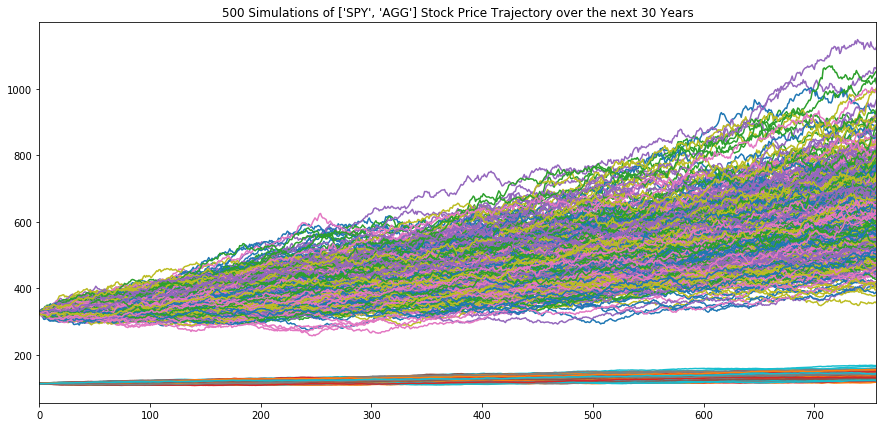

In [37]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{number_simulations} Simulations of {list_of_tickers} Stock Price Trajectory over the next 30 Years"
monte_carlo.plot(figsize=(15,7), legend = None, title = plot_title)

In [40]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
simulated_daily_returns = monte_carlo.pct_change().dropna()

In [41]:
simulated_daily_returns

,SPY Simulation 1,AGG Simulation 1,SPY Simulation 2,AGG Simulation 2,SPY Simulation 3,AGG Simulation 3,SPY Simulation 4,AGG Simulation 4,SPY Simulation 5,AGG Simulation 5,...,SPY Simulation 496,AGG Simulation 496,SPY Simulation 497,AGG Simulation 497,SPY Simulation 498,AGG Simulation 498,SPY Simulation 499,AGG Simulation 499,SPY Simulation 500,AGG Simulation 500
1,-0.009320,-0.000029,0.012436,0.000163,-0.008925,-0.000162,0.014642,-0.000027,0.004131,0.000033,...,0.009273,0.003133,-0.010422,-0.004558,-0.000187,0.003852,-0.004038,-0.004817,-0.016922,0.000396
2,0.002929,0.002233,0.005417,-0.001229,0.016982,-0.000916,-0.000463,-0.003425,0.002465,-0.001218,...,-0.013554,-0.000878,0.006506,0.001155,0.009876,-0.005451,-0.002235,0.002348,0.000689,0.000695
3,-0.002924,0.000596,-0.000320,-0.002051,-0.010410,0.001744,-0.004006,-0.001510,0.008329,-0.002696,...,0.020960,0.000293,0.006658,-0.001562,-0.008256,-0.005450,0.014557,0.003393,0.002029,0.000476
4,-0.006102,-0.003441,-0.000973,-0.000076,-0.007369,0.002495,0.012201,0.000449,0.005673,0.000358,...,-0.003342,0.001652,0.001629,-0.003681,-0.006541,-0.000901,-0.002530,0.000306,-0.007309,0.002177
5,-0.003220,-0.002645,0.002491,0.001152,-0.010284,0.000324,-0.001932,0.000092,-0.001116,-0.000926,...,0.004329,0.001056,0.004950,-0.002042,-0.003402,0.000412,0.009083,0.000025,0.005092,-0.001607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,-0.000583,0.000239,-0.001578,0.004275,0.003168,0.003819,0.004517,-0.000968,-0.005939,-0.000540,...,0.005264,-0.001332,0.008097,-0.000188,0.000327,-0.004507,-0.008459,-0.002372,0.009515,0.001383
753,0.010051,0.001534,0.005045,0.001398,-0.003205,0.002889,0.004550,0.002489,-0.004632,0.002768,...,-0.000429,-0.000217,-0.006893,0.002225,-0.005055,0.001706,-0.003077,-0.002291,-0.003439,-0.002328
754,-0.009921,0.001172,-0.005387,-0.000563,-0.008386,0.002755,0.003165,0.000320,0.003172,0.001149,...,-0.001342,-0.003246,-0.000718,-0.004085,-0.012595,0.000028,-0.004097,0.000693,-0.003351,0.002373
755,-0.007287,-0.000848,-0.006927,0.003086,-0.012347,-0.001361,0.006372,-0.001247,0.004738,0.000411,...,0.011670,-0.000670,0.005916,0.002129,0.007637,-0.000314,0.003278,0.002431,0.003546,-0.000012


In [42]:
simulated_daily_returns.iloc[-1]

SPY Simulation 1     -0.008458
AGG Simulation 1      0.001672
SPY Simulation 2      0.007743
AGG Simulation 2      0.001464
SPY Simulation 3     -0.004708
                        ...   
AGG Simulation 498    0.002657
SPY Simulation 499   -0.001546
AGG Simulation 499   -0.000748
SPY Simulation 500   -0.003477
AGG Simulation 500    0.001831
Name: 756, Length: 1000, dtype: float64

In [43]:
weights =[0.6/500,0.4/500]*500
portfolio_returns = simulated_daily_returns.dot(weights)

In [44]:
portfolio_returns

1      0.000103
2      0.000805
3      0.000397
4      0.000399
5      0.000807
         ...   
752    0.000372
753    0.000659
754    0.000648
755    0.000874
756    0.000384
Length: 756, dtype: float64

In [48]:
cumulative_returns = (1+portfolio_returns).cumprod()
cumulative_returns

1      1.000103
2      1.000908
3      1.001306
4      1.001705
5      1.002514
         ...   
752    1.605864
753    1.606922
754    1.607964
755    1.609370
756    1.609988
Length: 756, dtype: float64

In [82]:
cumulative_returns[30]

1.0166451985453335

In [49]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
cumulative_returns[20]

1.0112165171982073

In [50]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval =cumulative_returns.quantile(q = [0.05, 0.95])
confidence_interval

0.05    1.022661
0.95    1.574121
dtype: float64

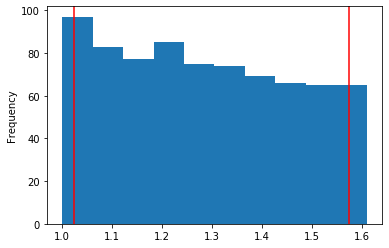

In [52]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure()
cumulative_returns.plot.hist()
plt.axvline(confidence_interval.iloc[0], color = 'r')
plt.axvline(confidence_interval.iloc[1], color = 'r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [53]:
# YOUR CODE HERE
confidence_interval_a =cumulative_returns.quantile(q = [0.05, 0.95])
confidence_interval_a

0.05    1.022661
0.95    1.574121
dtype: float64

In [54]:
confidence_interval_b = cumulative_returns.quantile(q = [0.25, 0.75])
confidence_interval_b

0.25    1.128408
0.75    1.434395
dtype: float64

In [55]:
confidence_interval_c = cumulative_returns.quantile(q = [0.10, 0.90])
confidence_interval_c 

0.1    1.047881
0.9    1.538765
dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [56]:
# YOUR CODE HERE
initial_investment = 20000

In [57]:
# 90th percentile
exp_port_return_upper_a = initial_investment * confidence_interval_a.iloc[1]
exp_port_return_lower_a = initial_investment * confidence_interval_a.iloc[0]

print(round(exp_port_return_lower_a,2))
print(round(exp_port_return_upper_a,2))

20453.22
31482.41


In [58]:
exp_port_return_upper_b = initial_investment * confidence_interval_b.iloc[1]
exp_port_return_lower_b = initial_investment * confidence_interval_b.iloc[0]

print(round(exp_port_return_lower_b,2))
print(round(exp_port_return_upper_b,2))

22568.16
28687.9


In [59]:
exp_port_return_upper_c = initial_investment * confidence_interval_c.iloc[1]
exp_port_return_lower_c = initial_investment * confidence_interval_c.iloc[0]
print(round(exp_port_return_lower_c,2))
print(round(exp_port_return_upper_c,2))

20957.62
30775.3


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE